## Main Context:-
As a vehicle salesperson, I would like to create a model that can estimate the overall amount that consumers would spend given the following characteristics:
customer name, customer email, country, gender, age, annual salary, credit card debt, and net worth

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Optional (for callbacks like EarlyStopping)
from tensorflow.keras.callbacks import EarlyStopping

#### download data set from kaggle

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yashpaloswal/ann-car-sales-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\DRT\.cache\kagglehub\datasets\yashpaloswal\ann-car-sales-price-prediction\versions\1


In [3]:
df = pd.read_csv("car_purchasing.csv", encoding="ISO-8859-1")

#### Dataset Overview

In [4]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
df = df.iloc[:, 2:]
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              500 non-null    object 
 1   gender               500 non-null    int64  
 2   age                  500 non-null    float64
 3   annual Salary        500 non-null    float64
 4   credit card debt     500 non-null    float64
 5   net worth            500 non-null    float64
 6   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


In [8]:
df.isna().sum()

country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['country'] = df['country'].replace('Israel', 'Palestine')

In [11]:
df['country'].value_counts()

country
Palestine              6
Mauritania             6
Bolivia                6
Greenland              5
Saint Barthélemy       5
                      ..
El Salvador            1
Denmark                1
Oman                   1
Trinidad and Tobago    1
marlal                 1
Name: count, Length: 211, dtype: int64

In [12]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [13]:
x

array([[0.00000000e+00, 4.18517198e+01, 6.28120930e+04, 1.16093809e+04,
        2.38961250e+05],
       [0.00000000e+00, 4.08706234e+01, 6.66468929e+04, 9.57295714e+03,
        5.30973908e+05],
       [1.00000000e+00, 4.31528975e+01, 5.37985511e+04, 1.11603551e+04,
        6.38467177e+05],
       ...,
       [1.00000000e+00, 5.39434972e+01, 6.88887780e+04, 1.06116069e+04,
        7.64531320e+05],
       [1.00000000e+00, 5.91605086e+01, 4.98119906e+04, 1.40130345e+04,
        3.37826638e+05],
       [1.00000000e+00, 4.67311525e+01, 6.13706777e+04, 9.39134163e+03,
        4.62946492e+05]])

### Splitting data for train and test

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 5) (100, 5) (400,) (100,)


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.98019606,  0.4104977 , -1.6619508 , -0.64933159, -0.24462287],
       [-1.02020406,  0.5448837 ,  0.85586707, -0.93240467, -1.49187534],
       [-1.02020406,  1.23781276, -0.38457054, -1.14202773, -0.0960339 ],
       ...,
       [-1.02020406, -1.45388407,  1.9018063 ,  0.90404545, -1.06181584],
       [-1.02020406,  0.60686745, -0.37735122, -2.12230328, -1.55376175],
       [-1.02020406, -0.7713426 ,  0.78984347, -0.48138186, -0.06728634]])

In [16]:
from sklearn.preprocessing import StandardScaler
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()
y_train

array([-0.87935776,  0.16848993,  0.49695953, -0.83295546, -1.41349565,
       -0.62391323,  0.73691949,  0.27610647,  1.7736841 , -1.14146817,
        0.80861937,  0.3158527 , -0.43388983,  0.36991506,  0.65327469,
       -0.80158534,  1.08814305,  1.2526457 ,  1.03442917,  1.57070988,
       -1.12050016,  0.43725512, -1.02053968,  0.45795028, -0.96120007,
        0.03555853, -1.05732602,  0.02872784,  0.36591186,  0.21938971,
        0.31667132, -0.19089914, -0.12210187,  0.37801337,  0.06372127,
       -0.25244513, -0.36926774,  0.16538912, -3.27518294, -0.42345637,
        1.13752893,  0.3935664 ,  0.83500858, -0.64400851, -0.19338213,
        1.10819611, -0.41559742,  0.12257828, -0.92635052,  1.17327441,
       -1.3667683 , -0.74080959,  0.42681919,  0.3462816 ,  1.43527327,
        0.29771554,  0.80851531,  0.66117259,  1.54281354,  0.50972768,
       -0.76078924, -1.53498119, -0.16414911, -1.35601994,  0.03534675,
       -0.24270862, -0.0758493 ,  0.03820459,  0.09836702,  0.37

### Building architucture of ANN

In [17]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

C:\Users\DRT\.conda\envs\DST_7\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Train the ANN

In [18]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=200,
                    validation_split=0.2,
                    callbacks=[early_stop])

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.8170 - mae: 0.7139 - val_loss: 0.6596 - val_mae: 0.6500
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4404 - mae: 0.5043 - val_loss: 0.3217 - val_mae: 0.4440
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2289 - mae: 0.3569 - val_loss: 0.1021 - val_mae: 0.2441
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0649 - mae: 0.1838 - val_loss: 0.0332 - val_mae: 0.1349
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0251 - mae: 0.1211 - val_loss: 0.0275 - val_mae: 0.1288
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0223 - mae: 0.1168 - val_loss: 0.0155 - val_mae: 0.0979
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0126 - mae: 0.0844 - val_loss: 0.0101 - val_mae: 0.0763
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067 - mae: 0.0629 - val_loss: 0.0083 - val_mae: 0.0670
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.00

In [19]:
y_pred=model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [20]:
r2_score(y_test,y_pred)

0.9987736803555712

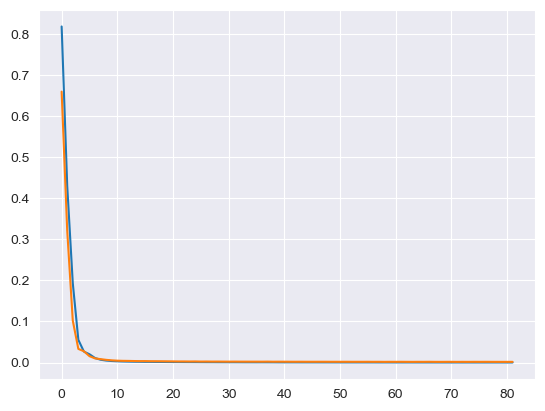

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [22]:
# Example: Prompting user for 5 input values
import numpy as np

# Replace these prompts with actual feature descriptions if known
input_data = []
input_data.append(float(input("Enter value for feature 1 (e.g., gender): ")))
input_data.append(float(input("Enter value for feature 2 (e.g., Age): ")))
input_data.append(float(input("Enter value for feature 3 (e.g., Salary): ")))
input_data.append(float(input("Enter value for feature 4 (e.g., Credit Card Debt): ")))
input_data.append(float(input("Enter value for feature 5 (e.g., Net Worth): ")))

# Convert to NumPy array and reshape
input_array = np.array(input_data).reshape(1, -1)

# Scale using previously fitted StandardScaler
scaled_input = sc.transform(input_array)

# Predict using trained model
predicted = model.predict(scaled_input)

# Inverse-transform if y was scaled
predicted = y_scaler.inverse_transform(predicted)

print(f"Predicted Car Purchase Amount: {predicted[0][0]:,.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Car Purchase Amount: 34,703.18
